               type  count
0        earthquake   9160
1      quarry blast     90
2         explosion     33
3         ice quake     22
4       other event      3
5  debris avalanche      1


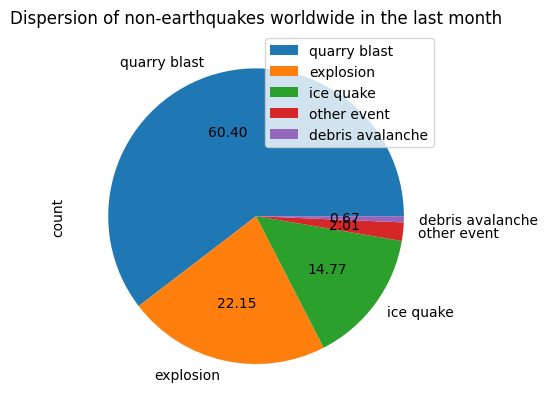

In [184]:
# Earthquake data from 26/12/23 to today (25/1/24)
# Assignment 5 for The Developer Academy 

# import the libraries needed 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# import data into a data frame
quake_data = pd.read_csv('all_month.csv')

'''
NOTE: I will shorten data frame to df for ease of use

The columns included in this data frame are:
- time: when the earthquake happened
- latitude: earth lat of location
- longitude: earth long of location
- depth: depth of earthquake
- mag: magnitude of earthquake
- magType: different ways of measuring magnitude, generally different according to location, overall not very different so can be directly compared
- nst - number of stations, the higher it is, the more reliable the measurements
- gap - azimuthal gap, degrees, helps with accuracy
- dmin - closest distance between the earthquake hypocenter (the point on the fault where the earthquake originates) and the nearest seismic station that recorded the earthquake, again relates to reliability of data
- rms - root mean square, commonly used to express the average amplitude of ground motion in seismic data, helps det average seismic wave amplitude of ground
- net - seismic network that recorded the event 
- id - related to network
- updated - reliability 
- place - location of earthquake relating to nearest big city
- type - includes type of earthquake - not all are earthquakes -> earthquake, quarry blast, explosion, other event, debris avalanche
- hortizontalError - machine measurement of error
- depthError - machine measurement of error
- magNst
- status - automatic or reviewed 
- locationSource
- magSource
'''


# Let's make a plot out of the non-earthquake data - how many non-earthquakes have occurred in the last month strong enough to be recorded as one?

# Let's select for the type column and get all types first 
counting_quakes = quake_data['type'].value_counts().reset_index() #counts the types of quake and what it is

total_earthquakes = counting_quakes.iloc[0,1] # returns count of earthquakes, which is an integer
total_nonquakes = counting_quakes.iloc[1:].loc[:, 'count'].sum() # adds up the count of all non-earthquakes
total_quakes = total_earthquakes + total_nonquakes # total earthquake-like events that have been recorded


percentage_nonquakes = (total_nonquakes / total_quakes) * 100 # 1.6% are non-earthquake events 

# select for non-earthquakes - choose index to delete and drop them from df, using reset index to ensure it remains a df
index_to_delete = 0
counting_nonquakes = counting_quakes.drop(index_to_delete)
counting_nonquakes = counting_nonquakes.reset_index(drop=True)

fig = plt.figure()
ax = fig.subplots()

# rename the column names of the df for ease of use in the plot
counting_nonquakes.columns = ['type', 'count']

# create a pie chart of the non-earthquake events strong enough to be recorded as earthquakes  
counting_nonquakes.plot(kind='pie', y='count', labels = counting_nonquakes['type'], autopct = '%1.2f', ax=ax)
ax.set_title('Dispersion of non-earthquakes worldwide in the last month')
ax.legend(loc='upper right')


Text(0.5, 1.0, 'Number of quakes according to region in the last month')

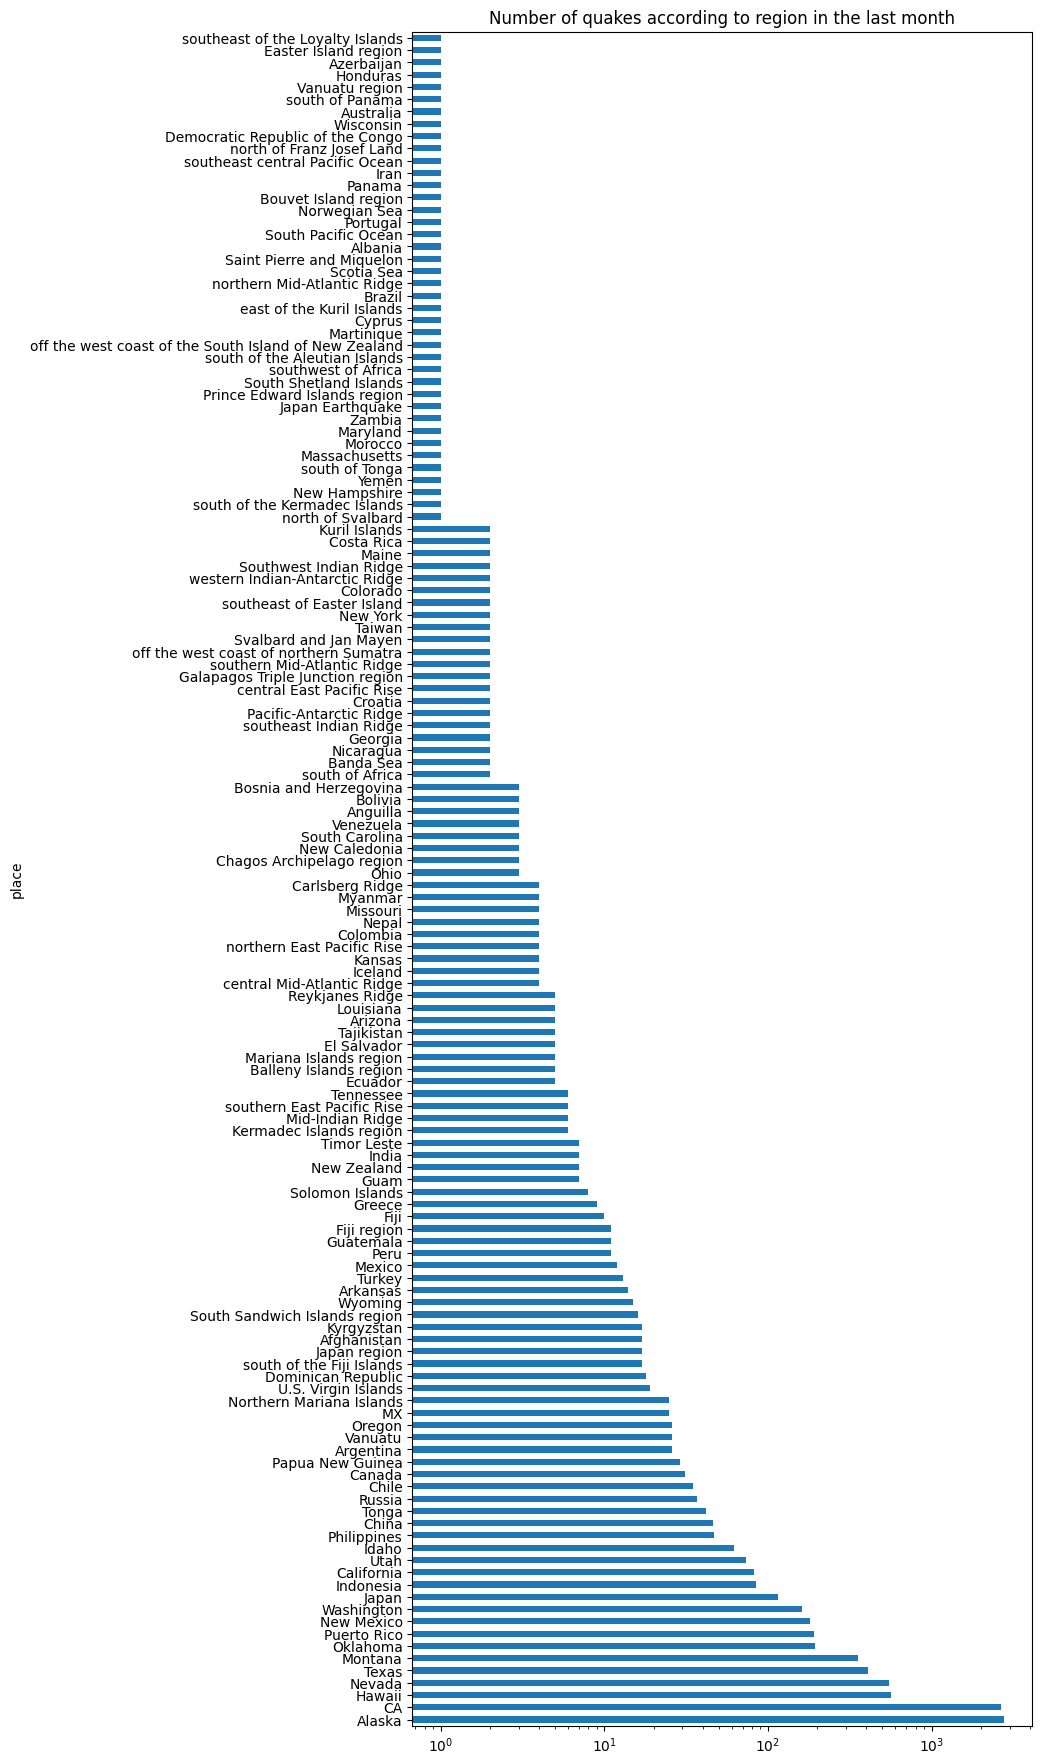

In [118]:
# Let's play with location - we need to extract this first

# Get the last word of the 'place' column - this will usually be the state or country the earthquake happened in 
location_of_quakes = quake_data['place'].str.split(',').str[-1].str.strip()

# Get the names of all the places 
states = location_of_quakes.unique()

# Count how many quakes happen in each state 
number_of_state_events = location_of_quakes.value_counts()

# Let's plot this! I think a horizontal bar plot would work well 
fig, ax = plt.subplots(figsize=(8, 22))
number_of_state_events.plot(kind='barh', ax=ax, logx=True)
ax.set_title('Number of quakes according to region in the last month')




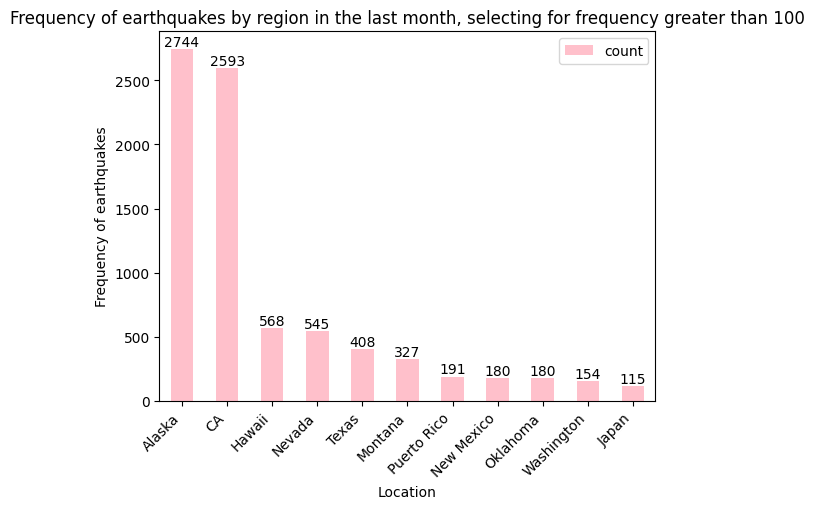

In [119]:
# Let's take out the non-earthquakes because I don't want to keep calling them quakes

earthquake_data = quake_data[ quake_data['type'] == 'earthquake']
earthquake_data = earthquake_data.reset_index(drop=True)

# This new dataset only contains earthquake data now - we can finally call them earthquakes!! 
# Let's select for location -> we are isolating the final series of words, this will have all the counts and all the names 
location_of_earthquakes = earthquake_data['place'].str.split(',').str[-1].str.strip()

# This is where we pick the unique locations
countries = location_of_earthquakes.unique()

# And this is where we count the number of earthquakes for each location - this is the frequency 
number_of_earthquakes = location_of_earthquakes.value_counts()

# Let's now select for places that have had more than 10^2 earthquakes (we know from the plot above that there are a lot of places with only 1 event)
relevant_earthquakes = number_of_earthquakes[number_of_earthquakes > 100] 

# We need to convert this into a data frame in order to make a scatter plot 
earthquakes_by_location = pd.DataFrame(relevant_earthquakes).reset_index()
earthquakes_by_location.columns = ['location', 'count']

fig, ax = plt.subplots()
earthquakes_by_location.plot(kind='bar', y='count', x='location', ax=ax, color='pink')
ax.set_title('Frequency of earthquakes by region in the last month, selecting for frequency greater than 100')
ax.set_xlabel('Location')
ax.set_ylabel('Frequency of earthquakes')
plt.xticks(rotation=45, ha='right')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, str(int(height)), ha='center', va='bottom')

# This gives us a bar plot showing earthquakes (eliminating less than 100 counts) per region in the last month 



Text(0.5, 1.0, 'Earthquakes on the world map in the last month')

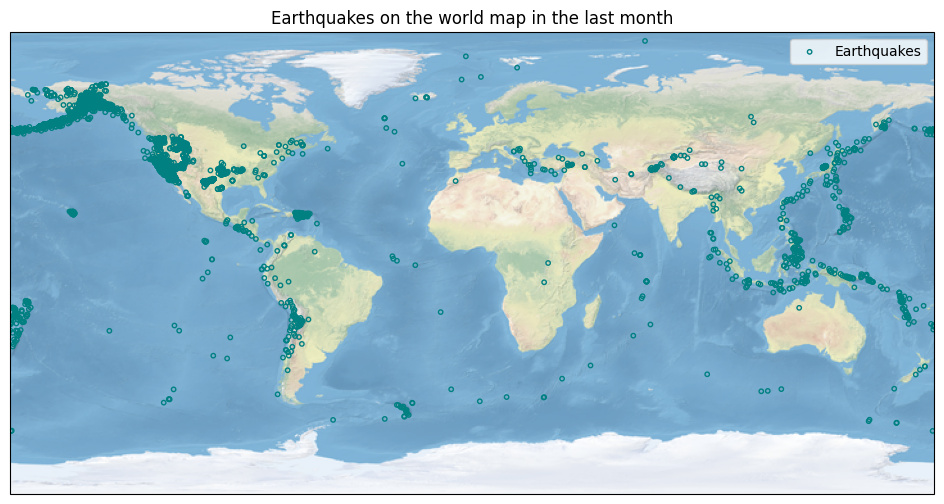

In [155]:
import cartopy.crs as ccrs

# Let's plot longitude against latitude

longitude = earthquake_data['longitude'] #vertical lines
latitude = earthquake_data['latitude'] #horizontal lines 

fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()

ax.scatter( x=longitude, y=latitude,  marker='o', s=10, facecolors='none', color='teal', label='Earthquakes')
ax.legend()
ax.set_title('Position of earthquakes in the last month')


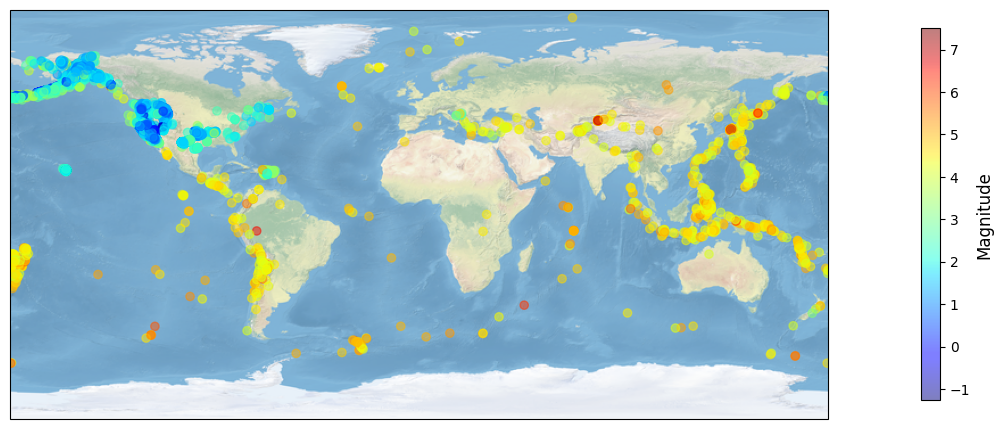

In [196]:
# Attempting to make a heat map with the above

import matplotlib.colors as mcolors

magnitude = earthquake_data['mag'] # get magnitude data 
normalize = mcolors.Normalize(vmin=np.min(magnitude), vmax=np.max(magnitude)) #normalize the magnitude numbers to colors 

fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()

scatter = ax.scatter( x=longitude, y=latitude,  
            c=magnitude, #color is to magnitude
            alpha=0.5,
            cmap='jet',
            norm=normalize,
            transform=ccrs.PlateCarree()
)

# Add a colorbar with a label to the plot
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Magnitude', fontsize=12)  # Set font size for colorbar label
cbar.ax.tick_params(labelsize=10)  # Set font size for colorbar ticks